In [17]:
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# log_json = "./output/plots/00.2_dynCNN_reuse_optim_v0_cifar10_1_event_dict.json"
# log_file = "./output/logs/00.2_dynCNN_reuse_optim_v0_log_1.txt"

log_json = "./output/plots/00.2_dynCNN_reuse_optim_v1_c100_cifar100_1_event_dict.json"
log_file = "./output/logs/00.2_dynCNN_reuse_optim_v1_c100_log_1.txt"

In [19]:
with open(log_json, 'r') as fp:
    logs = json.load(fp)

In [20]:
logs.keys()

dict_keys(['train_accs', 'test_accs', 'event_dict'])

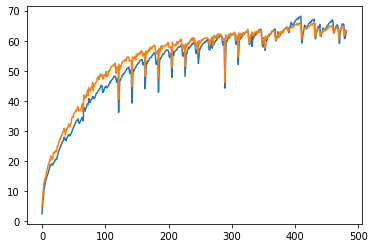

In [21]:
plt.plot(logs['train_accs'])
plt.plot(logs['test_accs'])

In [22]:
logs['event_dict']

[[0, 'neurons added'],
 [16, 'neurons decayed'],
 [20, 'neurons pruned'],
 [21, 'neurons added'],
 [37, 'neurons decayed'],
 [41, 'neurons pruned'],
 [42, 'neurons added'],
 [58, 'neurons decayed'],
 [62, 'neurons pruned'],
 [63, 'neurons added'],
 [67, 'neurons decayed'],
 [71, 'neurons pruned'],
 [72, 'neurons added'],
 [75, 'neurons decayed'],
 [79, 'neurons pruned'],
 [80, 'neurons added'],
 [96, 'neurons decayed'],
 [100, 'neurons pruned'],
 [101, 'neurons added'],
 [117, 'neurons decayed'],
 [121, 'neurons pruned'],
 [122, 'neurons added'],
 [138, 'neurons decayed'],
 [142, 'neurons pruned'],
 [143, 'neurons added'],
 [159, 'neurons decayed'],
 [163, 'neurons pruned'],
 [164, 'neurons added'],
 [180, 'neurons decayed'],
 [184, 'neurons pruned'],
 [185, 'neurons added'],
 [201, 'neurons decayed'],
 [205, 'neurons pruned'],
 [206, 'neurons added'],
 [222, 'neurons decayed'],
 [226, 'neurons pruned'],
 [227, 'neurons added'],
 [243, 'neurons decayed'],
 [247, 'neurons pruned'],
 [24

## Load parameters and epoch from log file

In [23]:
epoch_param_acc = []

with open(log_file, 'r') as f:
#     line = f.readline()
    while True:
        line = f.readline()
        if line=="": break
            
        if not line.startswith('###'): continue
        ##### finds the first line of stats, extract epoch from here
#         print(line.split("|")[-1].strip().split(":")[1].strip())
        epoch = line.split("|")[-1].strip().split(":")[1].strip()
        
        line = f.readline()
#         print(line.split("|")[-1].strip().split(":")[1].strip())
        params = line.split("|")[-1].strip().split(":")[1].strip()
#         epoch_param[int(epoch)] = int(params)
        
        line = f.readline()
#         print(line.split("|")[-1].strip().split(":")[1].strip())
        acc = line.split("|")[-1].strip().split(":")[1].strip()
#         epoch_param[int(epoch)] = int(params)
        
    
        epoch_param_acc.append((int(epoch), int(params), float(acc)))

In [24]:
epoch_param_acc = np.array(epoch_param_acc)
epoch_param_acc

array([[1.50000e+01, 1.69144e+05, 2.17200e+01],
       [2.00000e+01, 1.35838e+05, 2.25000e+01],
       [3.60000e+01, 2.03506e+05, 3.09400e+01],
       [4.10000e+01, 1.53836e+05, 3.10600e+01],
       [5.70000e+01, 2.27244e+05, 3.79900e+01],
       [6.20000e+01, 1.71069e+05, 3.73100e+01],
       [6.60000e+01, 2.45308e+05, 3.73400e+01],
       [7.10000e+01, 1.89820e+05, 4.16400e+01],
       [7.40000e+01, 2.62569e+05, 4.16800e+01],
       [7.90000e+01, 1.98711e+05, 4.46300e+01],
       [9.50000e+01, 2.67959e+05, 4.88300e+01],
       [1.00000e+02, 2.20125e+05, 4.84300e+01],
       [1.16000e+02, 2.97005e+05, 5.25700e+01],
       [1.21000e+02, 2.39704e+05, 5.11500e+01],
       [1.37000e+02, 3.16103e+05, 5.45500e+01],
       [1.42000e+02, 2.60911e+05, 5.34000e+01],
       [1.58000e+02, 3.42138e+05, 5.67500e+01],
       [1.63000e+02, 2.80067e+05, 5.55100e+01],
       [1.79000e+02, 3.61402e+05, 5.84900e+01],
       [1.84000e+02, 2.84855e+05, 5.67400e+01],
       [2.00000e+02, 3.74403e+05, 5.9410

## Plot param vs accuracy plot

In [25]:
######## Cifar 100 --> default: 128 batch size

### (62.44, 'resnet20_b4_c100_inplanes_12_params_404080_bs128.pth') 
### (63.7, 'resnet20_b4_c100_inplanes_12_params_404080.pth') --> 32 batch size
### (65.43, 'resnet20_b4_c100_inplanes_15_params_627655_bs128.pth')
### (67.01, 'resnet20_b4_c100_inplanes_17_params_803945_bs128.pth')

In [26]:
max_val = np.max(logs['test_accs'])
max_idx = np.argmax(logs['test_accs'])
max_idx, max_val

(429, 65.98)

In [27]:
indx = np.nonzero(epoch_param_acc[:,0]>=max_idx)[0][0]

In [28]:
max_val_pam = epoch_param_acc[indx][1]
max_val_pam

654026.0

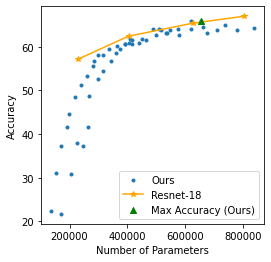

In [29]:
resnet_acc = [
    (229537, 57.18),
    (404080, 62.44),
    (627655, 65.43),
    (803945, 67.01),
]
resnet_acc = np.array(resnet_acc)

plt.figure(figsize=(4, 4))

# plt.plot(epoch_param_acc[:,1], epoch_param_acc[:,2], marker='.')
plt.scatter(epoch_param_acc[:,1], epoch_param_acc[:,2], marker='.', label="Ours")

# plt.scatter(resnet_acc[:,0], resnet_acc[:,1], marker='*', label="Resnet-18")
plt.plot(resnet_acc[:,0], resnet_acc[:,1], marker='*', color='orange', label="Resnet-18")

plt.scatter([max_val_pam], [max_val], marker='^', color='g', label="Max Accuracy (Ours)", zorder=5)

# plt.xscale('log')
plt.xlabel("Number of Parameters")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("./params_vs_acc_c100.pdf")
plt.show()

In [30]:
epoch_param_acc[:,1]

array([169144., 135838., 203506., 153836., 227244., 171069., 245308.,
       189820., 262569., 198711., 267959., 220125., 297005., 239704.,
       316103., 260911., 342138., 280067., 361402., 284855., 374403.,
       299817., 393254., 314889., 406687., 337975., 440496., 363606.,
       465103., 391107., 500145., 409993., 517033., 417715., 532130.,
       416259., 537816., 450710., 575068., 488695., 619595., 509902.,
       654026., 549118., 709903., 579240., 736417., 620073., 779884.,
       661479., 837850., 675792.])

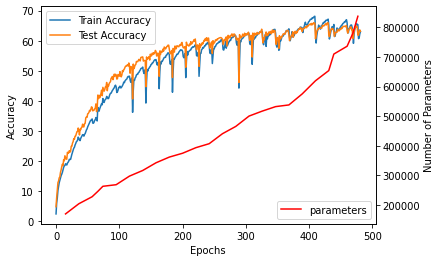

In [31]:


h0 = plt.plot(logs['train_accs'], label="Train Accuracy")
h1 = plt.plot(logs['test_accs'], label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=2)
ax = plt.gca()

### plot epoch vs parameters as well
ax2 = ax.twinx() 
h2 = ax2.plot(epoch_param_acc[::2,0], epoch_param_acc[::2,1], c='r', label="parameters")
ax2.set_ylabel("Number of Parameters")
ax2.legend(loc=4)

plt.savefig("./steps_vs_acc_c100.pdf", bbox_inches='tight')
plt.show()

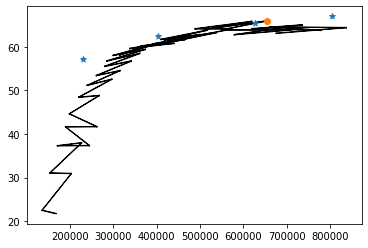

In [32]:
### plot arrows:
for i in range(len(epoch_param_acc)-1):
    x0, y0 = epoch_param_acc[i, 1], epoch_param_acc[i, 2]
    x1, y1 = epoch_param_acc[i+1, 1], epoch_param_acc[i+1, 2]
    plt.arrow(x0, y0, x1-x0, y1-y0, width=0.1)

# plt.plot(epoch_param_acc[:,1], epoch_param_acc[:,2], marker='.')
# plt.scatter(epoch_param_acc[:,1], epoch_param_acc[:,2], marker='.')

plt.scatter(resnet_acc[:,0], resnet_acc[:,1], marker='*')
plt.scatter([max_val_pam], [max_val], marker='o')


## Read Meta-Parameters

In [33]:
morph_meta_params = []

meta_keys = ["num_add_neuron", "add_to_remove_ratio", "learning_rate", "num_decay_steps",\
                "threshold_max", "threshold_min", "train_epoch_min", "threshold_max"]

with open(log_file, 'r') as f:
#     line = f.readline()
    while True:
#     for i in range(100):
        line = f.readline()
        if line=="": break
            
        if not line.startswith('━━━━━━━━━━━━━━━━━━━'): continue
        line = f.readline()
        if not line.startswith('━━━━━━━━━━━━━━━━━━━'): continue
            
        
        values = []
        for key in meta_keys:
            line = f.readline()
            val = line.split(f'{key} :')[-1].strip()
            values.append(val)

        morph_meta_params.append(
        (int(values[0]), float(values[1]), float(values[2]), float(values[3]), 
         float(values[4]), float(values[5]), float(values[6]), float(values[7]), )
        )

In [34]:
len(morph_meta_params), len(epoch_param_acc) ### same values == 1to1 mapping

(52, 52)

In [35]:
morph_meta_params, epoch_param_acc[:,0], epoch_param_acc[:,2]

([(50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),
  (50, 2.5, 0.0003, 782.0, 0.5, 0.01, 1.0, 15.0),


In [36]:
morph_meta_params = np.array(morph_meta_params)

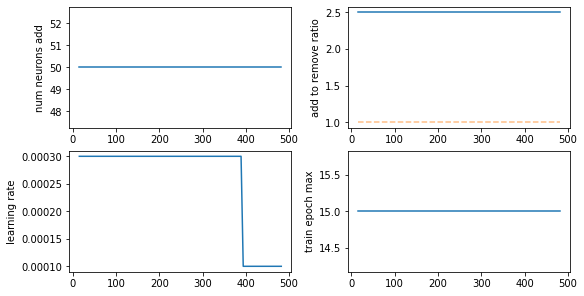

In [38]:
### Plotting meta parameters
# plt.figure(figsize=(8, 6))
fig, axes = plt.subplots(2,2, figsize=(8, 4), constrained_layout=True)
(ax00, ax01), (ax10, ax11) = axes


# ax00 = plt.subplot(221)
epochs = epoch_param_acc[:,0]
num_add = morph_meta_params[:, 0]
ax00.plot(epochs, num_add)
ax00.set_ylabel("num neurons add")
# plt.show()

# ax01 = plt.subplot(222)
add2rem = morph_meta_params[:,1]
ax01.plot(epochs, add2rem)
ax01.plot(epochs, add2rem*0+1, linestyle='dashed', alpha=0.5) ## plotting straight line
ax01.set_ylabel("add to remove ratio")
# plt.show()

# ax10 = plt.subplot(223)
lr = morph_meta_params[:,2]
ax10.plot(epochs, lr)
ax10.set_ylabel("learning rate")
# plt.show()

# ax11 = plt.subplot(224)
trmax = morph_meta_params[:,7]
ax11.plot(epochs, trmax)
ax11.set_ylabel("train epoch max")

plt.savefig("./meta-params_c100.pdf", bbox_inches='tight')
plt.show()